In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import indicoio
import config

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
def sentiment(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt

In [2]:
ckey = config.client_key
csecret = config.client_secret
atoken = config.access_token
asecret = config.access_secret

indicoio.config.api_key = config.indicoio_key

In [ ]:
class listener(StreamListener):
    def on_data(self, data):
        try:
            tweet_dict = json.loads(data)
            tweet = tweet_dict['text']
            print(tweet)
            polarity = sentiment(tweet) 
            
            tweet_output = open("tweets.txt", 'a')
            tweet_output.write(tweet)
            tweet_output.write('\n')
            tweet_output.close()
            
            sentiment_output = open("sentiment_scores.txt", 'a')
            sentiment_output.write(str(polarity['pos']) + ' ' + str(polarity['neg']) + ' ' + str(polarity['neu']))
            sentiment_output.write('\n')
            sentiment_output.close()
            
            return True
        except BaseException as e:
            pass

    def on_error(self, status_code):
        print(status_code)

In [ ]:
auth = OAuthHandler(ckey, csecret)

In [ ]:
auth.set_access_token(atoken, asecret)

In [ ]:
twitterStream = Stream(auth, listener())

In [ ]:
twitterStream.filter(track=["trump"], languages=["en"])

<IPython.core.display.Javascript object>


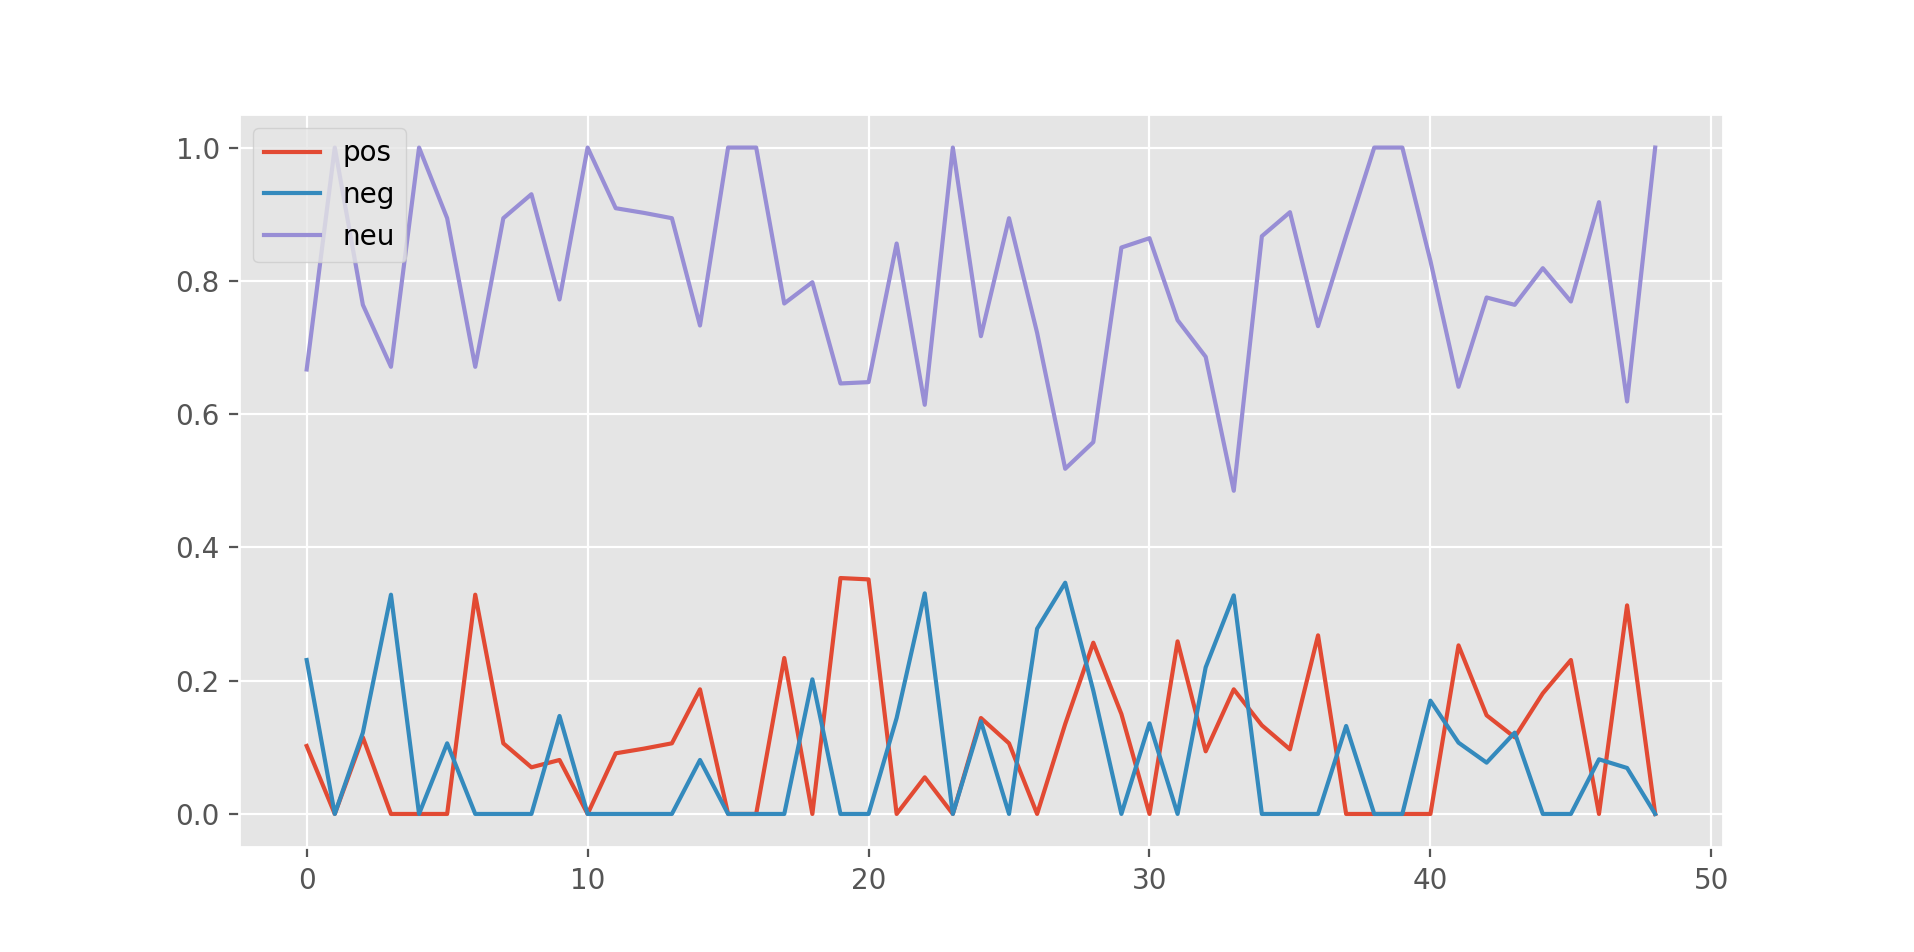

In [3]:
# Show sentiment graph of recent 50 tweets
style.use('ggplot')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

f = open("sentiment_scores.txt","r").read()
lines = f.split('\n')

xar = []
ypos = []
yneg = []
yneu = []

x = 0
for l in lines[-50:]:
    scores = l.strip().split()
    if len(scores) != 3:
        continue
    xar.append(x)
    ypos.append(float(scores[0]))
    yneg.append(float(scores[1]))
    yneu.append(float(scores[2]))
    x += 1

ax1.plot(xar,ypos)
ax1.plot(xar,yneg)
ax1.plot(xar,yneu)
plt.legend(['pos', 'neg', 'neu'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


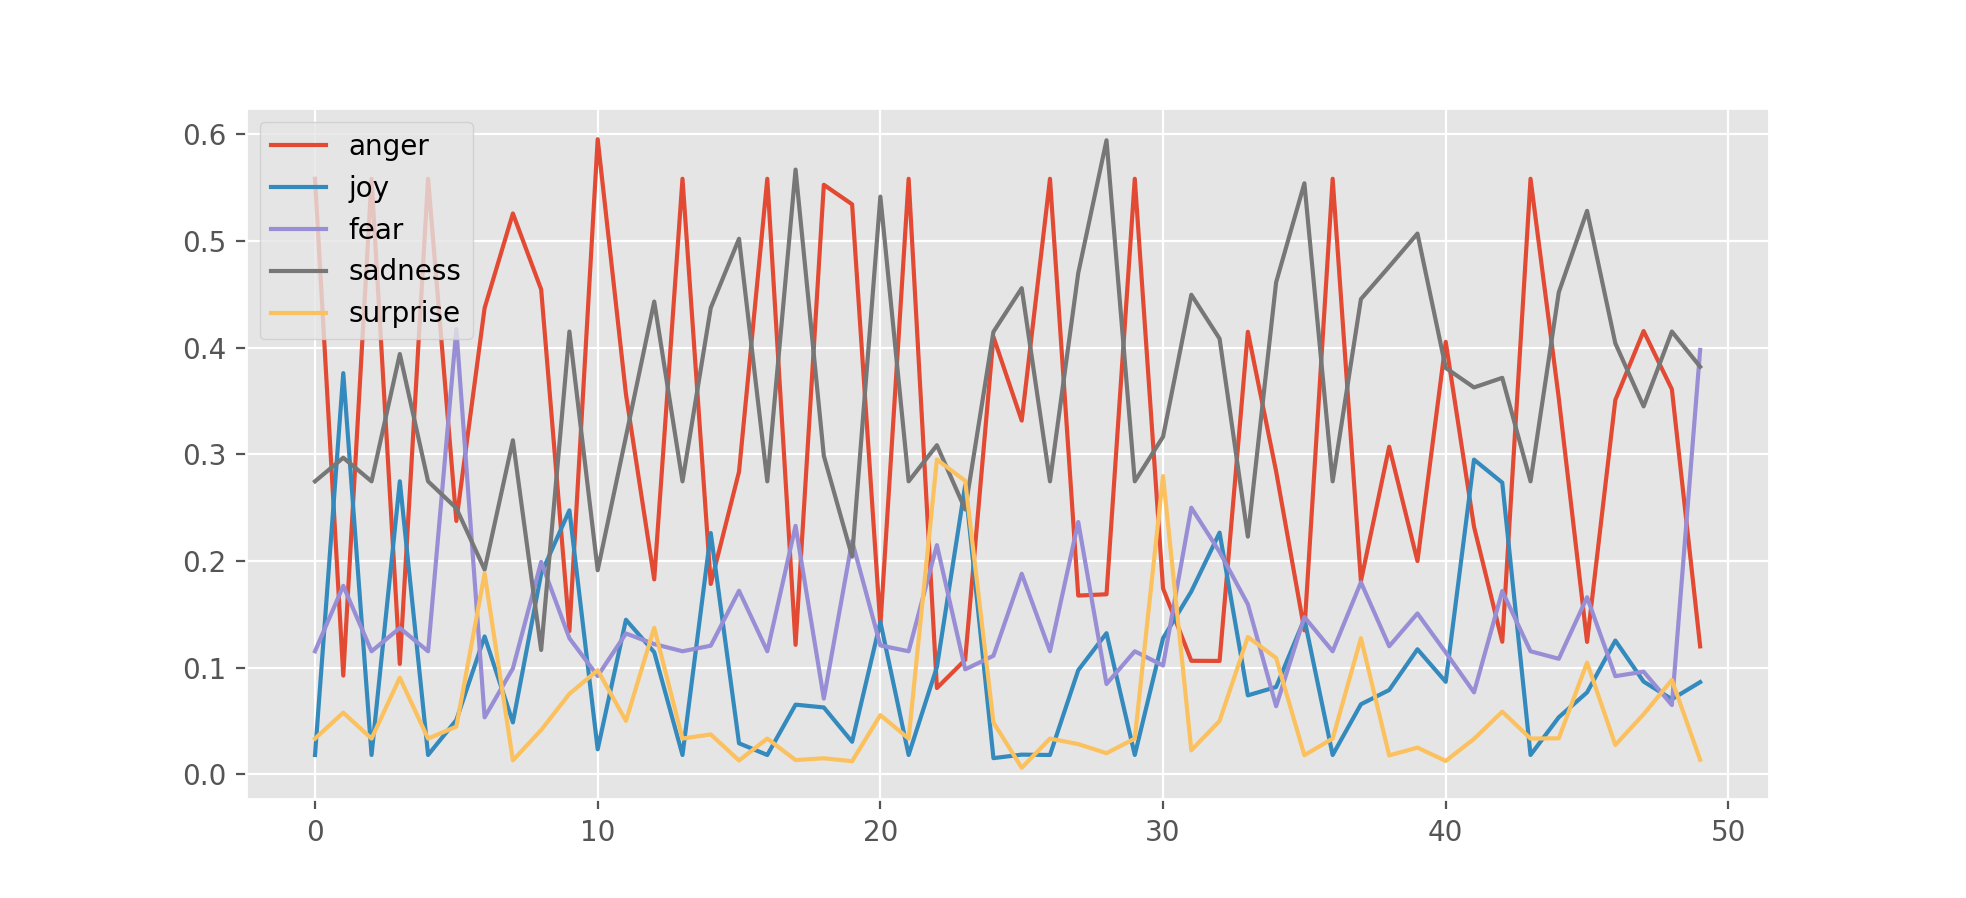

In [4]:
# Show emotion graph of recent 50 tweets
style.use('ggplot')

f = open("tweets.txt","r").read()
lines = f.split('\n\n')

xar = []
yanger = []
yjoy = []
yfear = []
ysadness = []
ysurprise = []

tweet_list = []
x = 0
for l in lines[-50:]:
    
    tweet_list.append(l)
    xar.append(x)
    x += 1

emotion_scores = indicoio.emotion(tweet_list)

for i in range(50):
    yanger.append(emotion_scores[i]['anger'])
    yjoy.append(emotion_scores[i]['joy'])
    yfear.append(emotion_scores[i]['fear'])
    ysadness.append(emotion_scores[i]['sadness'])
    ysurprise.append(emotion_scores[i]['surprise'])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(xar,yanger)
ax1.plot(xar,yjoy)
ax1.plot(xar,yfear)
ax1.plot(xar,ysadness)
ax1.plot(xar,ysurprise)

plt.legend(['anger', 'joy', 'fear', 'sadness', 'surprise'], loc='upper left')
plt.show()